# Plane wave

In this first lab of the ErSE 210 - Seismology course, we will look at *Plane waves*.

First of all we will use Python numerical libraries to create a plane wave defined as:
    
$$
u(\textbf{x}, t) = A exp^{-j(2\pi f t-\textbf{p}\textbf{x})}
$$

where $A$ is the amplitude, $f$ is the frequency, and $\textbf{p}$ is the slowness vector

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive

In [17]:
def plane_wave(x, y, A, f, c, theta, phi):
    """Plane wave modelling
    """
    # Define x and y grid
    Y, X = np.meshgrid(y, x, indexing='ij')

    t = 0 # time-snapshot

    p = (np.cos(np.deg2rad(theta)) / c,
         np.sin(np.deg2rad(theta)) / c) # Slowness vector
    pw = A * np.exp(-1j * (2 * np.pi * f * (t - (p[0]*X + p[1]*Y)) + np.deg2rad(phi)))
    pw = np.real(pw)
    
    return pw, p

## Single plane wave

In [30]:
# Define x and y axes
ox, dx, nx = 0, 5, 101
oy, dy, ny = 0, 5, 101

x, y = np.arange(nx) * dx + ox, np.arange(ny) * dy + oy 
Y, X = np.meshgrid(y, x, indexing='ij')

# Define plane wave parameters
A = 10 # amplitude
f = 20 # frequency
c = 1500 # Velocity
theta = 20 # Angle
phi = 180 # initial phase
t = 0 # time-snapshot

pw, p = plane_wave(x, y, A, f, c, theta, phi)

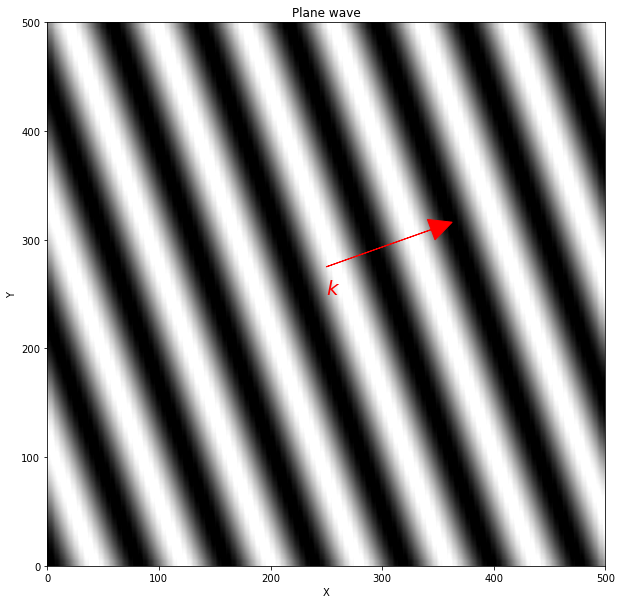

In [31]:
# 2D top view
plt.figure(figsize=(10, 10))
plt.imshow(pw, extent=(x[0], x[-1], y[0], y[-1]), cmap='gray', 
           origin='lower', interpolation='sinc')
plt.arrow(x[nx//2], y[ny//2+5], p[0] * c * dx * 20, p[1] * c * dx * 20,
          head_width=20, head_length=20, fc='r', ec='r')
plt.text(x[nx//2], y[ny//2], r'$k$', color='r', fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plane wave')
plt.axis('tight');

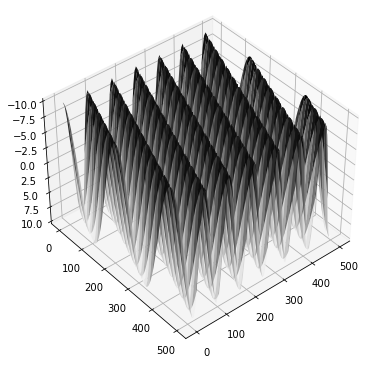

In [32]:
# 3D view
fig, ax = plt.subplots(figsize=(13, 5), subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, pw, cmap='gray')
ax.view_init(-140, -50)
plt.tight_layout()

We can now look at the KK spectrum. Given that we have one plane wave the energy should be all localized around one location, that of the $(k_x, k_y)$ pair

(-0.025, 0.025)

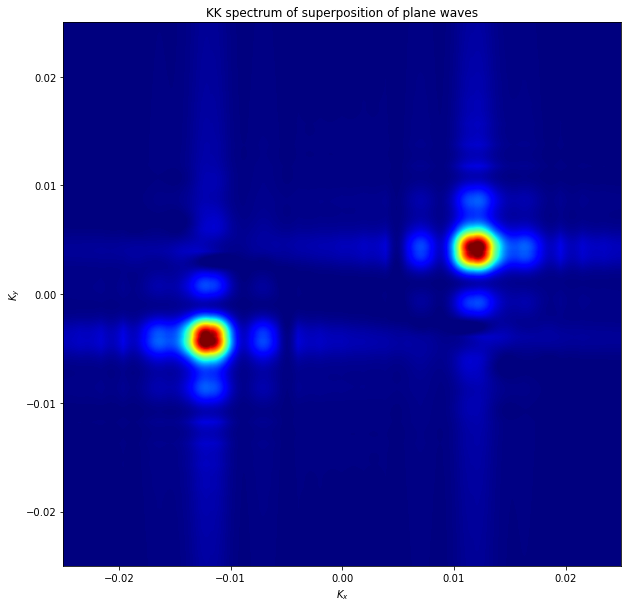

In [33]:
PW = np.fft.fft2(pw)
kx, ky = np.fft.fftshift(np.fft.fftfreq(nx, dx)), np.fft.fftshift(np.fft.fftfreq(ny, dy))

plt.figure(figsize=(10, 10))
plt.imshow(np.fft.fftshift(np.abs(PW)), extent=(kx[0], kx[-1], ky[0], ky[-1]),  
           cmap='jet', origin='lower', interpolation='sinc')
plt.xlabel(r'$K_x$')
plt.ylabel(r'$K_y$')
plt.title('KK spectrum of superposition of plane waves')
plt.axis('tight')
plt.xlim(-0.025, 0.025)
plt.ylim(-0.025, 0.025)

Let's now play with the different parameters ($f$, $theta$, $\phi$, $c$) using ipywidget 

In [34]:
def display_planewave(theta, phi, f, c):
    # Define x and y axes
    ox, dx, nx = 0, 5, 101
    oy, dy, ny = 0, 5, 101

    x, y = np.arange(nx) * dx + ox, np.arange(ny) * dy + oy 
    Y, X = np.meshgrid(y, x, indexing='ij')

    # Define plane wave parameters
    A = 10 # amplitude
    t = 0 # time-snapshot

    pw, p = plane_wave(x, y, A, f, c, theta, phi)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(pw, extent=(x[0], x[-1], y[0], y[-1]),  cmap='gray', origin='lower',
               interpolation='sinc')
    plt.arrow(x[nx//2], y[ny//2+5], p[0] * c * dx * 20, p[1] * c * dx * 20,
          head_width=20, head_length=20, fc='r', ec='r')
    plt.text(x[nx//2], y[ny//2], r'$k$', color='r', fontsize=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plane wave')
    plt.axis('tight');

interactive_plot = interactive(display_planewave, theta=(-90.0, 90.0), 
                               phi=(-90.0, 90.0), f=(0, 50), c=(1000, 4000))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='theta', max=90.0, min=-90.0), FloatSlider(value=0.0,…

## Multiple plane waves

Finally, let's try to superimpose multiple plane waves

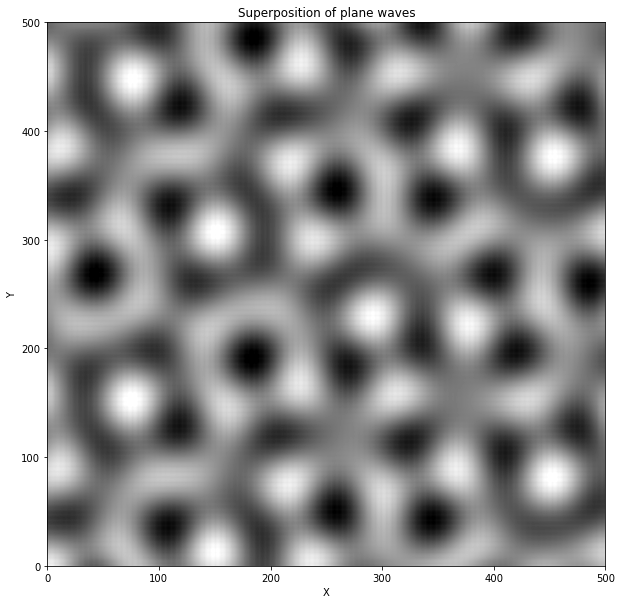

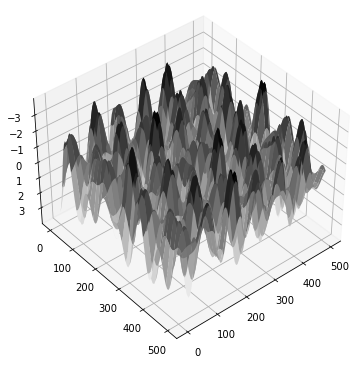

In [38]:
c = 1500
fs = [20, 20, 20, 20]
As = [1, 1, 1, 1]
thetas = [0, 90, -50, 30]
phis = [0, 20, 40, -60]

pw = [plane_wave(x, y, A, f, c, theta, phi)[0] for f, A, theta, phi in zip(fs, As, thetas, phis)]
pw = np.sum(pw, axis=0)

plt.figure(figsize=(10, 10))
plt.imshow(pw, extent=(x[0], x[-1], y[0], y[-1]),  cmap='gray', 
           origin='lower', interpolation='sinc')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Superposition of plane waves')
plt.axis('tight')

fig, ax = plt.subplots(figsize=(13, 5), subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, pw, cmap='gray')
ax.view_init(-140, -50)
plt.tight_layout()

Finally we show again the KK spectrum. Now we should expect more points.

(-0.025, 0.025)

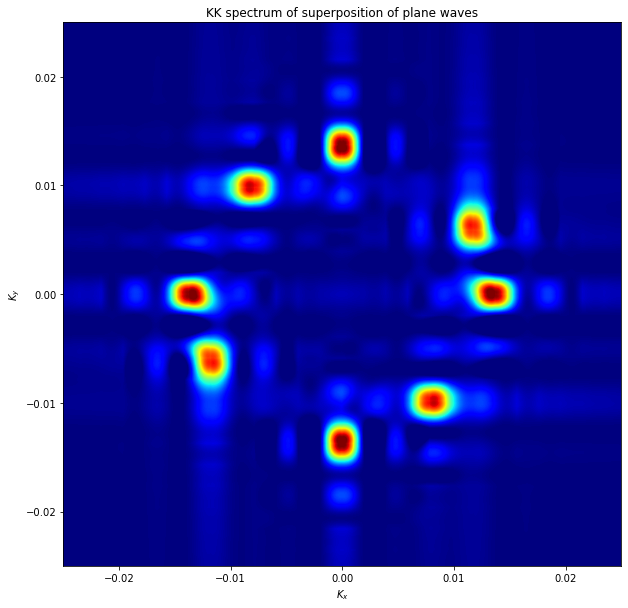

In [39]:
PW = np.fft.fft2(pw)
kx, ky = np.fft.fftshift(np.fft.fftfreq(nx, dx)), np.fft.fftshift(np.fft.fftfreq(ny, dy))

plt.figure(figsize=(10, 10))
plt.imshow(np.fft.fftshift(np.abs(PW)), extent=(kx[0], kx[-1], ky[0], ky[-1]),  
           cmap='jet', origin='lower', interpolation='sinc')
plt.xlabel(r'$K_x$')
plt.ylabel(r'$K_y$')
plt.title('KK spectrum of superposition of plane waves')
plt.axis('tight')
plt.xlim(-0.025, 0.025)
plt.ylim(-0.025, 0.025)

Play with the different parameters and see how the KK spectrum changes!